Cris Chou  
Text Classification

In [10]:
#Dataset https://archive.ics.uci.edu/ml/datasets/Gender+by+Name
import pandas as pd
df = pd.read_csv('../textclass/data/name_gender_dataset.csv')
df.head() 

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


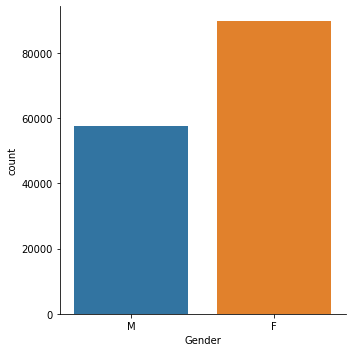

In [14]:
#Graph target distribution (genders)
import seaborn as sb

sb.catplot(x='Gender', kind='count', data=df)

In [41]:
#Dividing into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Name'], df.Gender, test_size=0.3, train_size= 0.7, random_state=1234)
X_train.shape


(103088,)

## Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import math

In [50]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stopwords)

In [51]:
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)

In [53]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# prior
prior_p = sum(y_train == 1)/len(y_train)


In [ ]:
#predicting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
pred = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, pred))